У завданнях 1-4. Вам наданий простий код на Python, який не відповідає вказівкам PEP8. Ваше завдання — відредагувати код так, аби він відповідав PEP8. Напишіть після редагуванню коду, дотримання яких правил з pep8 ви досягли в відредагованій версі, наприклад
```
- додала пробіли навколо бінарного оператора
- додала два порожні рядки між визначеннями функцій
і тд
```
Також можна зазанчити використані правила коментарями по коду, а не окремим повідомленням.

Відредагований код має виконувати весь той самий функціонал, але бути написаний відповідно до вимог до гарного коду на Python! Не забудьте запустити відредагований код, він має бути робочим.

Завдання 1.

In [7]:
def greet(name):print(f"Hello, {name}")
def add(n1,n2):return n1+n2

x = 5;y = 3
display(greet("John"),add(x,y))


Hello, John


None

8

In [8]:
def greet(name):
    print(f"Hello, {name}")
    
def add(n1,n2):
    return n1 + n2 #пробіли для оператора

x = 5
y = 3    #краще видно змінні з табуляцією

display(greet("John"),add(x,y))

Hello, John


None

8

Завдання 2.

In [9]:
from math import *
def calcArea(r):return pi*r**2
def calcCircumference(r):return 2*pi*r

radius=5
print("Area:",calcArea(radius),"Circumference:",calcCircumference(radius))

Area: 78.53981633974483 Circumference: 31.41592653589793


In [10]:
from math import *  #відділили імпорти від основного коду

def calcArea(r):
    return pi * r**2  #пробіли для множення
    
def calcCircumference(r):
    return 2 * pi * r #пробіли для множення

radius = 5  #пробіли для присвоєння

print("Area:",calcArea(radius),"Circumference:",calcCircumference(radius))

Area: 78.53981633974483 Circumference: 31.41592653589793


Завдання 3.

In [14]:
class animal: pass
class dog(animal): 
    def __init__(self,name):
        self.name=name
        self.type='Dog'

In [16]:
class animal:  #прибрала зайвий пробіл
    pass
             #простір між класами
    
class dog(animal):
    
    def __init__(self,name):
        self.name = name   #пробіли для оператора
        self.type = 'Dog'

Завдання 4.

In [17]:
list=[1,2,3,4,5]
for i in range(len(list)):print(list[i])

1
2
3
4
5


In [20]:
list = [1,2,3,4,5]  #пробіли для оператора

for element in list:
    print(element)  #спростили цикл

1
2
3
4
5


5.У вас є DataFrame df, що представляє результати тестів студентів з математики, англійської мови та історії. Поточний код обчислює середній бал для кожного студента шляхом ітерації за рядками DataFrame за допомогою iterrows().

Ваше завдання полягає в тому, щоб змінити код так, аби уникнути використання iterrows() і замість цього застосувати більш ефективне та читабельне рішення відповідно до правил, озвучених у лекції. Рефакторинг треба зробити лише частині, де рахуються середні, імпорт і визначення датафрейму лишаємо без змін.

In [19]:
import pandas as pd

df = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie', 'David'],
    'math_score': [89, 94, 77, 85],
    'english_score': [92, 88, 79, 85],
    'history_score': [84, 92, 81, 89]
})

In [26]:
averages = []
for _, row in df.iterrows():
    averages.append((row['math_score'] + row['english_score'] + row['history_score']) / 3)

df['average_score'] = averages

In [27]:
df['average_score']

0    88.333333
1    91.333333
2    79.000000
3    86.333333
Name: average_score, dtype: float64

In [32]:
df['average_score'] = df[['math_score', 'english_score', 'history_score']].mean(axis=1)

In [33]:
df['average_score']

0    88.333333
1    91.333333
2    79.000000
3    86.333333
Name: average_score, dtype: float64

6.У Вас є великий DataFrame df, що представляє транзакції продажу в магазині. Цей DataFrame містить понад 1 мільйон рядків і кілька стовпців, зокрема «product_name», «product_category», «product_price» і «transaction_date».

І «product_name», і «product_category» є рядками, що представляють численні, але обмежені унікальні назви продуктів і категорії відповідно.

Напишіть код для ефективного перетворення стовпців «product_name» і «product_category» на категорійний тип для ефективного використання пам’яті.
Спробуйте вирішити це завдання, мінімізуючи використання пам'яті та зберігаючи читабельність коду. Крім того, виміряйте використання пам’яті до та після перетворення, щоб продемонструвати підвищення ефективності.

Порівняйте кількість памʼяті, яку займає наданий набір даних і новий, створений Вами. В лекції був приклад. В скільки разів менше памʼяті займає новий датафрейм?

In [34]:
import pandas as pd
import numpy as np

np.random.seed(0)

products = ['apple', 'banana', 'cherry', 'dates', 'elderberry']
categories = ['fruit', 'fruit', 'fruit', 'fruit', 'fruit']

N_ROWS = 10**6
df = pd.DataFrame({
    'product_name': np.random.choice(products, N_ROWS),
    'product_category': np.random.choice(categories, N_ROWS),
    'product_price': np.random.uniform(1, 10, N_ROWS),
    'transaction_date': pd.date_range(start='1/1/2000', periods=N_ROWS, freq='h')
})

df.memory_usage(index=False).sum()

32000000

In [37]:
df_full_size = df.memory_usage(index=False).sum()

In [35]:
df_optimized = df.copy(deep=True)

for col in ['product_name', 'product_category']:
    df_optimized[col] = pd.Categorical(df_optimized[col])

df_optimized.memory_usage(index=False).sum()

18000328

In [38]:
df_optimized_size = df_optimized.memory_usage(index=False).sum()

In [39]:
print(f'Ми зменшили використання памʼяті у {round(df_full_size/df_optimized_size,2)} разів.')

Ми зменшили використання памʼяті у 1.78 разів.


In [36]:
print(f"Маємо зниження витрат памʼяті на {round((1-18000328/32000000)*100,2)}% !")

Маємо зниження витрат памʼяті на 43.75% !


Це ледь не половина.

7.В цьому завданні кілька пунктів. Треба виконати усі послідовно.   
    7.1. Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.  
    7.2. Заповніть пропущені значення в колонці CustomerID на -1 та перетворіть тип цієї колонки на str, адже зараз вона типу float, а це не правильний тип даних для ідентифікатора клієнта.  
    7.3. З допомогою бібліотеки sweetviz побудуйте html звіт, який порівнює дані для країни "Germany" і країни "France". У Вас можуть виникнути багато попереджень (Warning), їх рекомендую вимкнути наступним шматком коду   
    
   
    import warnings

    with warnings.catch_warnings(record=True):
        # your code
    
    
   7.4.Напишіть 5 відмінностей для двох зазначених країн на основі побудованого звіту, без виконання додаткового аналізу іншими інструментами. 

In [20]:
df = pd.read_csv('data/ecommerce_data.csv', encoding = 'ISO-8859-1')

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df.CustomerID = df.CustomerID.fillna(-1).astype(int).astype(str)

In [31]:
import sweetviz as sv

import warnings

with warnings.catch_warnings(record=True):
    report = sv.compare(df[df.Country=='Germany'], df[df.Country=='France'])
    report.show_html('sweet_report.html')

ModuleNotFoundError: No module named 'pkg_resources'

не знаю який такий модуль 'pkg_resources' він хоче.

8.З допомогою ChatGPT виявіть, чи є та які помилки в наступному коді.  
Попросіть після цього переписати код із дотриманням PEP8. Проаналізуйте результат. Чи справді ChatGPT виправив всі стилістичні помилки? Якщо ні, напишіть йому ще кілька запитів, аби код відповідав вимогам PEP8.  
Вставте фінальну версію коду з чату у ноутбук та запустіть на заданому списку. Має вертатись 50.  
Напишіть, які промпти (інструкції) при зверненні до ChatGPT ви застосували та додайте скріншот(-и) з промптами та відповідями чата.  
Якщо зробили висновки при виконанні цього завдання, то діліться також :)

**ЯК ВСТАВИТИ СКРІНШОТ в Jupyter Notebook** :
1. Створіть нову Markdown клітинку
2. В новоствореній клітинці обираєте в меню Jupyter Notebook Edit -> Insert Image
3. Обираєте картинку 
4. В клітинці має зʼявитись текст, який містить картинку. Запустіть клітинку.

Або можна просто перетягнути картинку в Markdown клітинку.

In [24]:
def CalculateVariance(nl):
    sum_list = 0
    for n in nl:
        sum_list = sum_list + n
    mean = sum_list / len(nl)
    sum_squares = 0
    for n in nl:
        sum_squares = sum_squares + n**2
    mean_squares = sum_squares / len(nl)
    return mean_squares

In [25]:
input_list = [75, 80, 85, 90, 95]

In [26]:
CalculateVariance(input_list)

7275.0

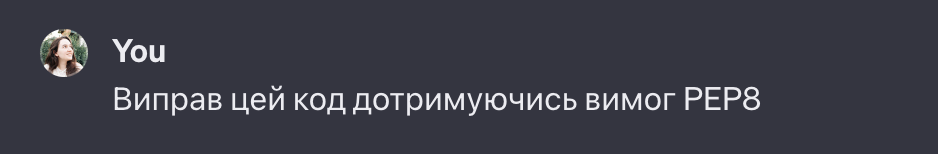

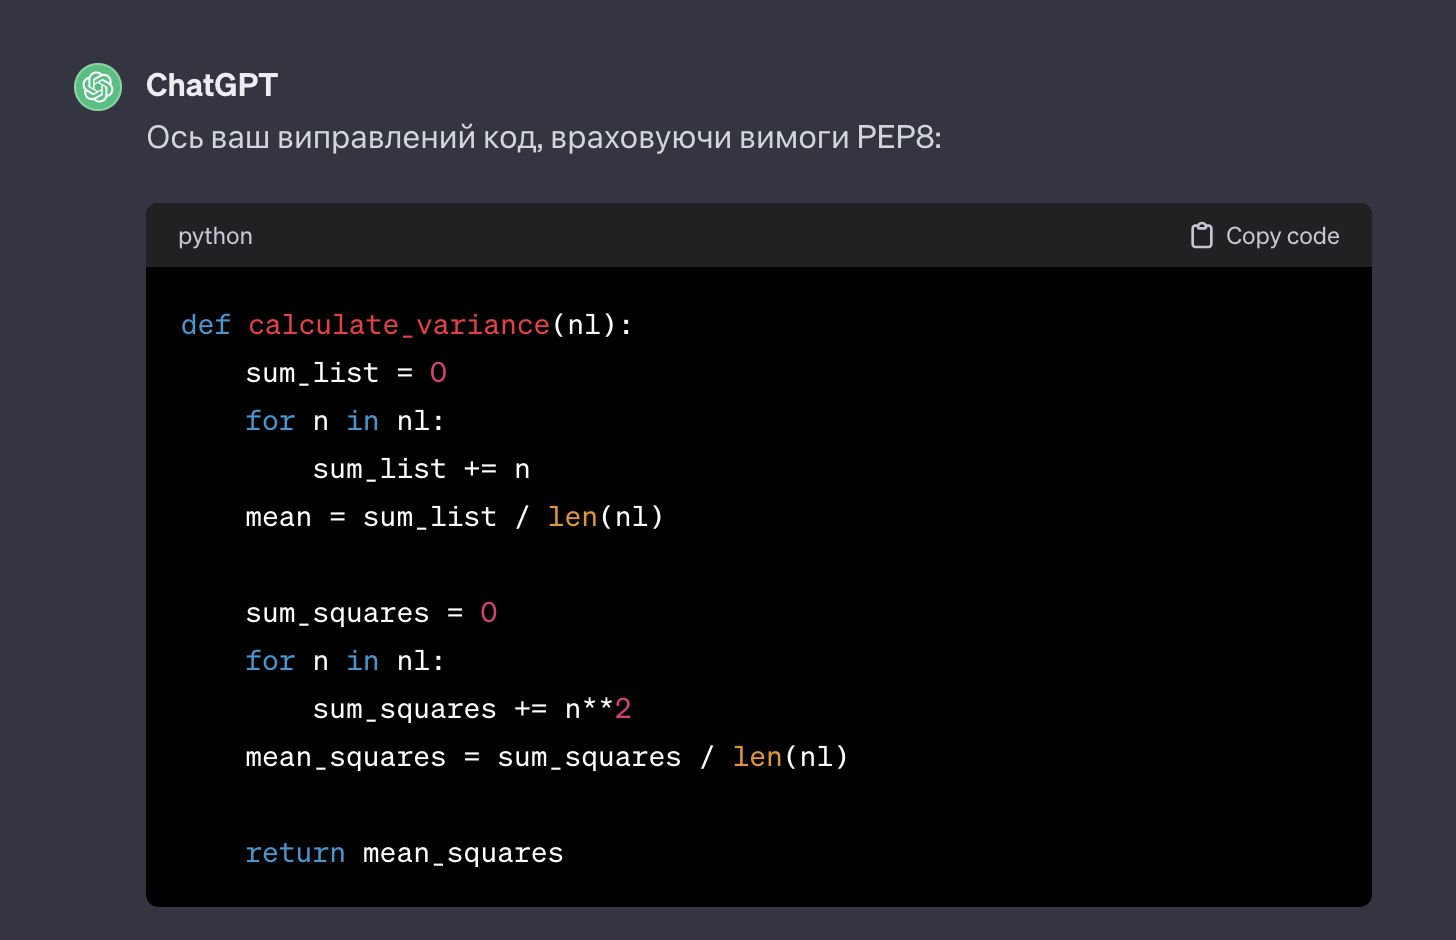

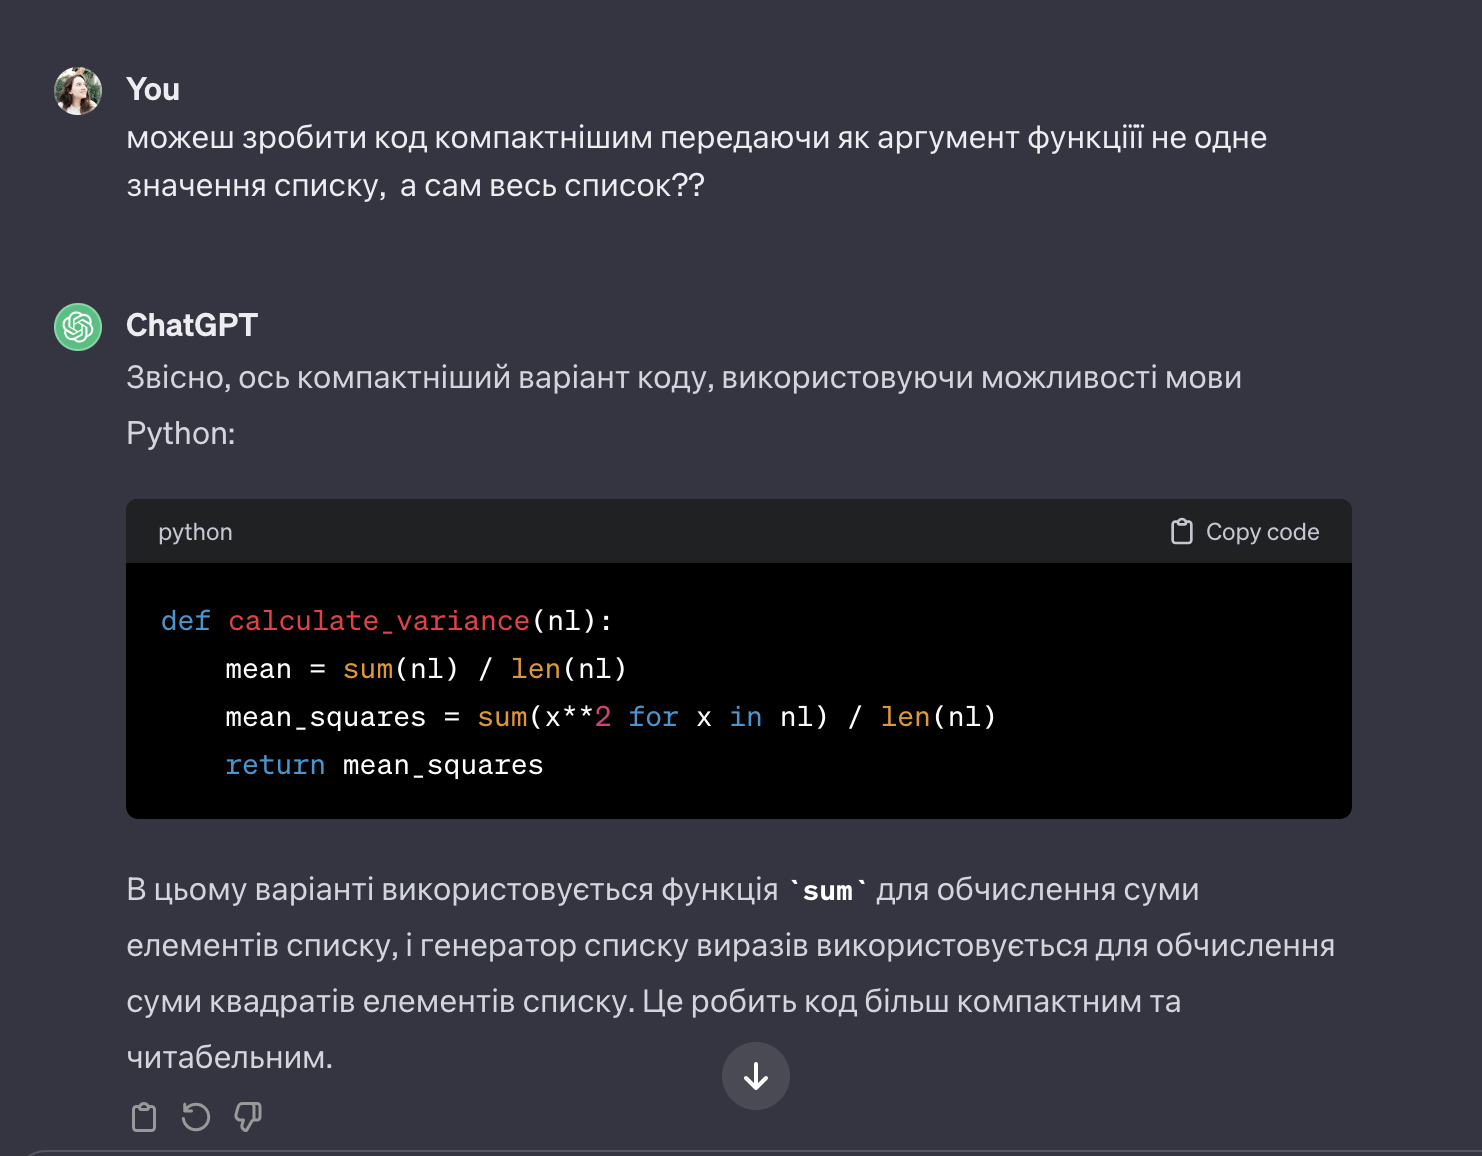

In [28]:
def calculate_variance(nl):
    mean = sum(nl) / len(nl)
    mean_squares = sum(x**2 for x in nl) / len(nl)
    return mean_squares

In [29]:
calculate_variance(input_list)

7275.0

Вопщем, тільки з моїми підказками зміг скоротити, а так, із пробілами, відступами і тд впорався добре. Сподіваюсь на нього ніяк не вплинуло те що я писала українською.